In [1]:
import os
import re
import json

import pandas as pd
%matplotlib nbagg
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [24]:
def fig_3d(d, n):
    p_data = [
        go.Surface(
            z=d.as_matrix()
        )
    ]
    
    layout = go.Layout(
        title=n,
        autosize=False,
        width=500,
        height=500,
        margin=dict(l=65, r=50, b=65, t=90)
    )
    return go.Figure(data=p_data, layout=layout)

def get_reads_data(run):
    run_data = {}
    dir_data = os.path.join(os.path.join('/Users/codeunsolved/NGS/Topgen-Dashboard/data', 'BRCA%s' % run), 'sample_cover')
    for sample in os.listdir(dir_data):
        dir_sample = os.path.join(dir_data, sample)
        if os.path.isdir(dir_sample):
            path_sdp = os.path.join(dir_sample, 'sample_data_pointer.json')
            with open(path_sdp, 'rb') as sdp:
                run_data[sample] = json.loads(sdp.read())['frag_reads']
    return pd.DataFrame(run_data)

def norm_data(d, option='double'):
    if option == 'by_s':
        return (d - d.min())/(d.max() - d.min())
    elif option == 'by_a':
        return norm_data(d.T, option='by_s').T
    elif option == 'double':
        return norm_data(norm_data(d, 'by_s'), 'by_a')
    else:
        raise Exception("Unknown Option: %s" % option)
        

In [25]:
data = get_reads_data(161116)
data.head()

,NGS161111-2,NGS161111-3,NGS161111-4,NGS161111-5-2,NGS161111-6-2,NGS161111-7-2,NGS161111-8,NGS161114-1,NGS161114-11,NGS161114-12,...,NGS161114-15,NGS161114-16,NGS161114-17,NGS161114-2,NGS161114-3,NGS161114-4,NGS161114-9,NGS161115-6,NGS161115-7,NGS161115-8
chr13-B150A01-32890522-32890740,1980,1263,1073,1245,4843,5554,5384,4517,11863,7591,...,7138,5091,2932,5764,5784,6835,8695,9452,7933,7434
chr13-B150A02-32893271-32893493,398,124,106,275,4704,3691,6198,5709,12019,7411,...,8211,5164,5068,6477,5772,6763,9441,11375,8916,8193
chr13-B150A03-32899235-32899405,593,441,252,407,8463,9436,11415,10418,24115,11946,...,9643,9094,9087,11650,10463,11651,13199,15900,11603,12512
chr13-B150A04-32900295-32900481,160,42,32,144,5709,4235,6290,6620,14610,7803,...,6854,5724,6165,6796,6257,7438,9589,12519,9002,9877
chr13-B150A05-32903521-32903739,195,52,41,102,3570,3860,3623,3632,7924,4935,...,4954,3611,2230,4234,4625,4971,7901,8872,6911,6396


In [23]:
py.iplot(fig_3d(data, 'BRCA161116'), filename='BRCA161116')

In [26]:
py.iplot(fig_3d(norm_data(data, 'by_s'), 'BRCA161116_norm_sample'), filename='BRCA161116_norm_sample')

In [27]:
py.iplot(fig_3d(norm_data(data, 'double'), 'BRCA161116_norm_double'), filename='BRCA161116_norm_double')

<IPython.core.display.Javascript object>


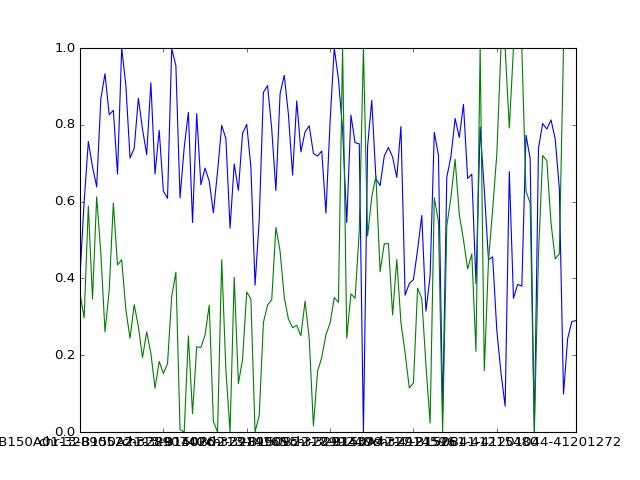

In [28]:
norm_data(data, 'double')['NGS161111-6-2'].plot()

<IPython.core.display.Javascript object>


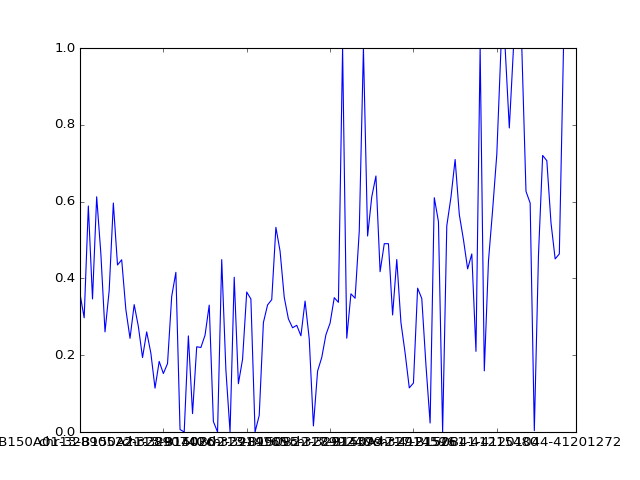

In [30]:
norm_data(data, 'double')['NGS161111-7-2'].plot()